In [ ]:
!pip install openpyxl
!pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.8/154.8 kB 2.5 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import pandas as pd

from collections import namedtuple
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
import textwrap
import seaborn as sns

import scipy.stats
import statsmodels.api as sm
from sklearn.utils import shuffle

import openpyxl
import xlsxwriter

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin'

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin


In [ ]:
!unzip "/content/drive/MyDrive/Colab_Notebooks/oai/control_used_for_embedding/Noto_Serif.zip"

Archive:  /content/drive/MyDrive/Colab_Notebooks/oai/control_used_for_embedding/Noto_Serif.zip
replace OFL.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
  inflating: NotoSerif-Regular.ttf   
replace NotoSerif-Italic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace NotoSerif-Bold.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace NotoSerif-BoldItalic.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!mv NotoSerif-Regular.ttf /usr/share/fonts/truetype/

In [ ]:
path_to_font='/usr/share/fonts/truetype/NotoSerif-Regular.ttf'
fontprop = fm.FontProperties(fname=path_to_font, size=15)

In [ ]:
# Set the random seed for reproducibility
np.random.seed(42)

In [ ]:
matched_oa_inc = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/publish_dataframes/TSNE_with_random_state/multivariate_partial_results/rand_state_oa_inc_matched_IDs_PC_modes.csv')

matched_oa_inc

,distance,id,side,pred_kl,KL,oa_prog,total_or_partial,tkr,hisp,race,...,lat_pc1,lat_pc2,lat_pc3,lat_pc4,lat_pc5,lat_pc6,lat_pc7,lat_pc8,lat_pc9,lat_pc10
0,0.823859,9003380,RIGHT,1.0,0,1,0.0,0,0.0,1.0,...,-92.197506,51.211310,-43.430714,-50.568625,47.319855,17.391308,-2.366378,-15.910127,-6.672869,-6.178514
1,0.751625,9005321,RIGHT,0.0,0,1,0.0,0,0.0,1.0,...,-38.814409,4.533038,-0.488909,13.726718,8.862756,3.412608,-16.830964,14.134342,10.370432,3.557692
2,0.920029,9006723,RIGHT,1.0,0,1,0.0,0,0.0,1.0,...,21.242921,54.849408,31.657136,-53.256867,-46.453745,9.559070,26.336411,4.602603,-3.064959,0.549345
3,0.951572,9008322,RIGHT,1.0,0,1,0.0,0,0.0,1.0,...,127.915670,6.312592,-42.896661,52.599368,-14.920261,-18.955394,22.001585,-23.680797,6.812858,-1.019516
4,0.728009,9008934,RIGHT,1.0,0,1,0.0,0,0.0,1.0,...,100.825950,-16.799299,-35.387747,58.432097,33.263331,-14.298897,-6.163161,-17.498737,-0.516694,-13.734606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.144618,9695881,RIGHT,0.0,0,0,0.0,0,0.0,1.0,...,-13.956095,-15.226989,-37.064647,-18.741990,-8.871064,-21.503654,5.124812,7.079757,5.343683,0.005147
710,0.345149,9104043,RIGHT,0.0,0,0,0.0,0,0.0,2.0,...,-45.014800,-58.165881,1.830398,8.981295,5.898000,-23.646326,-3.264983,-9.428873,2.932559,-3.836124
711,1.002088,9427182,RIGHT,0.0,0,0,0.0,0,0.0,2.0,...,-44.197121,-50.774896,40.906277,57.776615,45.043704,-3.160935,3.808487,11.131048,0.104939,0.918222
712,0.498588,9551668,RIGHT,0.0,0,0,0.0,0,0.0,2.0,...,16.248834,-26.295390,-18.224314,-42.805086,-11.789929,-3.145747,-2.754214,3.305710,0.437756,17.091723


In [ ]:
raw_coef = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/publish_dataframes/TSNE_with_random_state/multivariate_partial_results/OA_Inc/OA_Inc_bootstrap_elasticNet_coef_raw.csv'
conf_int_coef = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/publish_dataframes/TSNE_with_random_state/multivariate_partial_results/OA_Inc/OA_Inc_bootstrap_elasticNet_coef_confidence_intervals.csv'

sel_freq = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/publish_dataframes/TSNE_with_random_state/multivariate_partial_results/OA_Inc/OA_Inc_bootstrap_elasticNet_feature_selection_frequencies.csv'

bootstrap_oa = '/content/drive/MyDrive/Colab_Notebooks/oai/TKR_twin/publish_dataframes/TSNE_with_random_state/multivariate_partial_results/OA_Inc/bootstrap_checkpoint.pkl'

In [ ]:
raw_coef_df = pd.read_csv(raw_coef)
raw_coef_df

,Unnamed: 0,const,hisp,race,gender,Tenderness,Injury_history,Mild_symptoms,Heberden,Crepitus,...,lat_pc1,lat_pc2,lat_pc3,lat_pc4,lat_pc5,lat_pc6,lat_pc7,lat_pc8,lat_pc9,lat_pc10
0,0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.163235,0.000000,0.000000,...,0.000337,-0.003861,0.016348,-0.009967,0.005118,0.001241,-0.010454,-0.012235,0.000000,0.000000
1,1,0.0,0.0,0.000000,0.0,0.066700,0.000000,0.000000,0.000000,-0.546646,...,0.000000,-0.010651,0.028535,-0.041964,0.021522,-0.009119,-0.013021,-0.043420,0.090604,0.004196
2,2,0.0,0.0,0.000000,0.0,0.000000,0.209923,0.191512,-0.109098,-0.201682,...,0.013190,-0.005843,0.033404,-0.035096,0.027971,0.007464,-0.009611,-0.063393,0.107302,-0.019827
3,3,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.004734,-0.006595,0.010993,-0.023058,0.006606,0.007572,-0.018486,0.000000,0.000000,0.000000
4,4,0.0,0.0,0.000000,0.0,0.000000,0.167044,0.000000,0.000000,0.000000,...,-0.000936,-0.011065,0.026037,-0.043981,0.021506,-0.005263,-0.005151,-0.027559,0.084952,0.016342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.0,0.0,0.072923,0.0,0.000000,-0.138907,0.038243,0.000000,-0.686860,...,0.003435,-0.002897,0.029467,-0.020648,0.030931,-0.006339,0.014002,-0.044058,0.065115,-0.019298
996,996,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,-0.256296,...,0.002228,0.002782,0.024606,-0.043658,-0.001534,0.003745,-0.018144,-0.055604,0.074985,-0.043961
997,997,0.0,0.0,0.000000,0.0,-0.210629,0.000000,0.000000,0.000000,0.000000,...,-0.004245,-0.002795,0.038852,-0.041739,0.031277,-0.008039,-0.024349,-0.057878,0.135162,-0.043932
998,998,0.0,0.0,0.256127,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.006778,-0.009791,0.004794,-0.016316,0.000000,-0.000979,-0.017592,-0.012837,0.014025,0.000000


In [ ]:
sel_freq_df = pd.read_csv(sel_freq)
sel_freq_df

,Unnamed: 0,Selection Frequency
0,hisp,0.000
1,race,0.271
2,gender,0.067
3,Tenderness,0.245
4,Injury_history,0.308
...,...,...
119,lat_pc6,0.843
120,lat_pc7,0.874
121,lat_pc8,0.950
122,lat_pc9,0.772


# **evaluating variable importance**

In [ ]:
# Calculate the mean and standard deviation for each coefficient across the 1000 iterations.
means = raw_coef_df.mean()
std_devs = raw_coef_df.std()

# Calculate the 95% and 99% confidence intervals for each coefficient.
ci_95 = {}
ci_99 = {}
for col in raw_coef_df.columns:
    ci_95[col] = scipy.stats.norm.interval(0.95, loc=means[col], scale=std_devs[col]/np.sqrt(len(raw_coef_df)))
    ci_99[col] = scipy.stats.norm.interval(0.99, loc=means[col], scale=std_devs[col]/np.sqrt(len(raw_coef_df)))

# Create a DataFrame for the selection frequency.
df_selection_freq = pd.DataFrame({'variable': sel_freq_df['Unnamed: 0'], 'selection_frequency': sel_freq_df['Selection Frequency']})

# Merge the selection frequency DataFrame with the average coefficients and confidence intervals.
df_summary = pd.DataFrame(means, columns=['mean_coef'])
df_summary['std_dev'] = std_devs
df_summary['ci_95_lower'], df_summary['ci_95_upper'] = zip(*ci_95.values())
df_summary['ci_99_lower'], df_summary['ci_99_upper'] = zip(*ci_99.values())
df_summary = df_summary.merge(df_selection_freq, left_index=True, right_on='variable')

# Assuming a variable is included in the CI if the CI does not cross 0
df_summary['included_in_95'] = (df_summary['ci_95_lower'] * df_summary['ci_95_upper']) > 0
df_summary['included_in_99'] = (df_summary['ci_95_lower'] * df_summary['ci_95_upper']) > 0 # Update with actual 99% CI if available

# Add a column to indicate whether the confidence interval includes zero
df_summary['ci_includes_zero'] = (df_summary['ci_95_lower'] <= 0) & (df_summary['ci_95_upper'] >= 0)

# Effect Size and Confidence Interval Width
df_summary['ci_width'] = df_summary['ci_95_upper'] - df_summary['ci_95_lower']

# Calculate the error bars based on the confidence interval width
df_summary['error'] = (df_summary['ci_95_upper'] - df_summary['ci_95_lower']) / 2

# Adjusting the calculation of weighted importance using absolute values
df_summary['abs_mean_coef'] = df_summary['mean_coef'].abs()
df_summary['weighted_importance'] = df_summary['abs_mean_coef'] * df_summary['selection_frequency']

# Ranking Variables
df_summary['rank'] = df_summary['weighted_importance'].rank(ascending=False)

# df_summary

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2241: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:2242: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


In [ ]:
# defining the updated renaming function with edge case handling.

def rename_variable(var):
    prefix_mapping = {
        'bs': 'Bone Shape',
        'thick': 'Cartilage Thickness',
        't2': 'Cartilage T2',
        'med': 'Medial Meniscus Shape',
        'lat': 'Lateral Meniscus Shape'
    }
    body_part_mapping = {
        'fem': 'Femur',
        'tib': 'Tibia',
        'pat': 'Patella'
    }

    # Special cases for 'koos_' prefix, '_qol' suffix, and 'BMI'
    if var == 'koos_qol':
        return 'KOOS QOL'
    if var =='gender':
        return 'Sex'
    elif var.startswith('koos_'):
        return 'KOOS ' + var.split('_')[1].capitalize()
    elif var.endswith('_qol'):
        return ' '.join(var.split('_')[:-1]).capitalize() + ' QOL'
    elif var == 'BMI':
        return 'BMI'
    # Check if the variable starts with known prefixes
    elif any(var.startswith(prefix) for prefix in prefix_mapping):
        # Split the variable name by '_'
        parts = var.split('_')
        # Replace specific substrings according to the mappings
        name_parts = [prefix_mapping.get(parts[0], parts[0])] + [body_part_mapping.get(part, part) for part in parts[1:]]
        # Replace 'pc' with 'PC ' and add the number
        name_parts = [part if not part.startswith('pc') else 'PC ' + part[2:] for part in name_parts]
    else:
        # For edge cases, capitalize each part and join with space
        name_parts = [part.capitalize() for part in var.split('_')]

    # Join the parts with spaces and return the new name
    return ' '.join(name_parts)

# Apply the renaming function to the 'variable' column
df_summary['formatted_variable'] = df_summary['variable'].apply(rename_variable)


In [ ]:
# df_summary.to_excel('/content/drive/MyDrive/Colab_Notebooks/oai/oa_inc_robust_bootstrap_df.xlsx', index=False)

# check = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/oai/oa_inc_robust_bootstrap_df.xlsx')

# check

# **Visualizing Top 20 Features from bootstrap models**

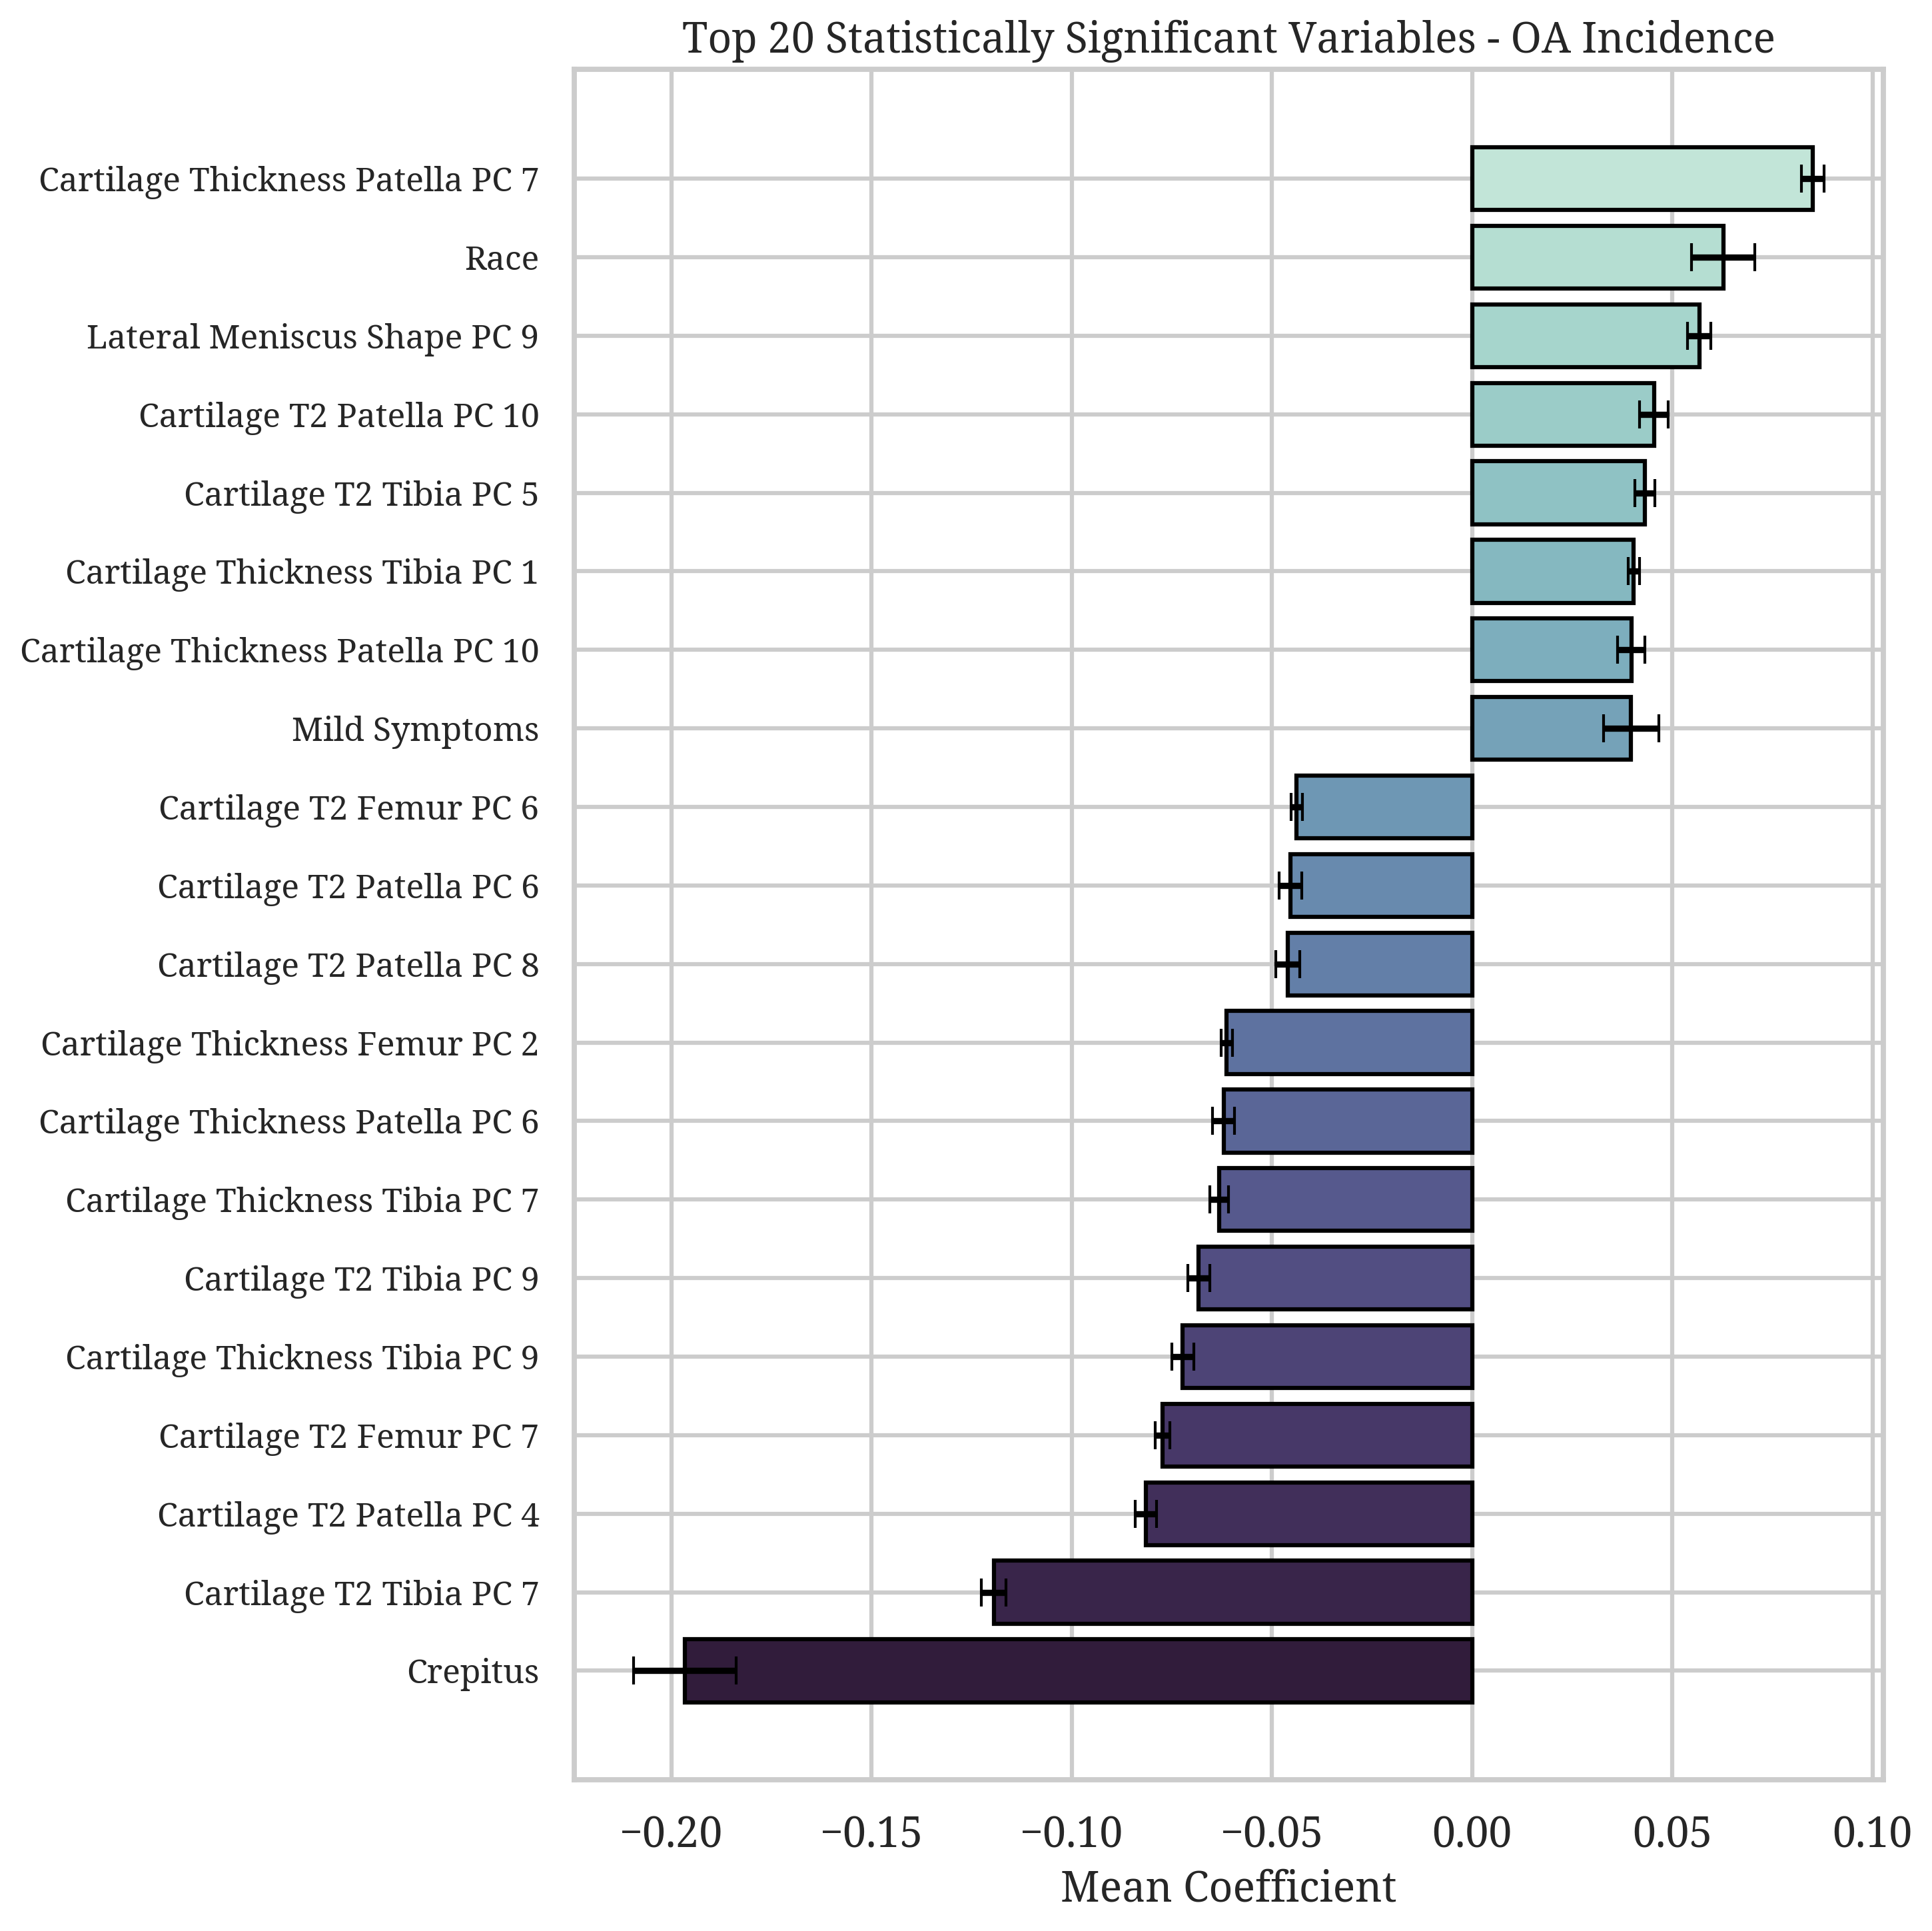

In [ ]:
# Set the number of variables you want to display
top_n = 20  # Adjust the number of top variables you want to show

# Sort by the abs_mean_coef from most positive to most negative for the top N significant coefficients
# Within the top N, sort from positive to negative mean_coef
significant_vars_top_n = df_summary[df_summary['ci_includes_zero'] == False].nlargest(top_n, 'abs_mean_coef')
significant_vars_top_n_sorted = significant_vars_top_n.sort_values(by='mean_coef', ascending=False)

# Apply the renaming function to the 'variable' column
significant_vars_top_n_sorted['formatted_variable'] = significant_vars_top_n_sorted['variable'].apply(rename_variable)


# Generate the color palette
cmap = sns.cubehelix_palette(start=.5, rot=-.5, n_colors=top_n, as_cmap=False)

# Plotting only the top N statistically significant variables using a horizontal bar plot with error bars
plt.figure(figsize=(10, 10), dpi=300)  # Adjust size as needed to make bars visible and readable

sns.set_context("talk")
sns.set_style("whitegrid")


barplot = plt.barh(significant_vars_top_n_sorted['formatted_variable'], significant_vars_top_n_sorted['mean_coef'],
                   xerr=(significant_vars_top_n_sorted['ci_95_upper'] - significant_vars_top_n_sorted['ci_95_lower']) / 2,
                   capsize=5, color=cmap, align='center', edgecolor='black')

# Set the font properties for both x and y-tick labels
plt.xticks(fontproperties=fontprop)
plt.yticks(fontproperties=fontprop, fontsize=12)

plt.xlabel('Mean Coefficient', fontproperties=fontprop)
plt.ylabel('')

plt.title('Top 20 Statistically Significant Variables - OA Incidence', fontproperties=fontprop)
plt.gca().invert_yaxis()  # Invert y-axis to have the largest positive coefficients at the top

plt.tight_layout()  # Adjust the layout

# save_path = '/content/drive/MyDrive/Colab_Notebooks/oai/oa_inc_top20_barplot_significant_values.svg'
# plt.savefig(save_path, format='svg', bbox_inches='tight')

plt.show()


# **Selection Threshold for Important Features**

In [ ]:
# Select the top 25% of features based on weighted importance

# Calculate the threshold for the top 25%
quantile_threshold = df_summary['weighted_importance'].quantile(0.75)

# Filter features that meet the threshold
important_features = df_summary[df_summary['weighted_importance'] >= quantile_threshold]

# Extract the names of these important features
selected_feature_names = important_features['variable'].tolist()

selected_feature_names

['Crepitus',
 't2_fem_pc6',
 't2_fem_pc7',
 't2_pat_pc3',
 't2_pat_pc4',
 't2_pat_pc6',
 't2_pat_pc8',
 't2_pat_pc10',
 't2_tib_pc5',
 't2_tib_pc6',
 't2_tib_pc7',
 't2_tib_pc8',
 't2_tib_pc9',
 'thick_fem_pc1',
 'thick_fem_pc2',
 'thick_fem_pc6',
 'thick_fem_pc10',
 'thick_pat_pc1',
 'thick_pat_pc2',
 'thick_pat_pc6',
 'thick_pat_pc7',
 'thick_pat_pc10',
 'thick_tib_pc1',
 'thick_tib_pc5',
 'thick_tib_pc7',
 'thick_tib_pc8',
 'thick_tib_pc9',
 'med_pc10',
 'lat_pc4',
 'lat_pc8',
 'lat_pc9']

**Add back in demographic covariates not automatically selected**

In [ ]:
covs = ['age', 'BMI', 'gender', 'race']
selected_feature_names.extend(covs)

In [ ]:
selected_feature_names

['Crepitus',
 't2_fem_pc6',
 't2_fem_pc7',
 't2_pat_pc3',
 't2_pat_pc4',
 't2_pat_pc6',
 't2_pat_pc8',
 't2_pat_pc10',
 't2_tib_pc5',
 't2_tib_pc6',
 't2_tib_pc7',
 't2_tib_pc8',
 't2_tib_pc9',
 'thick_fem_pc1',
 'thick_fem_pc2',
 'thick_fem_pc6',
 'thick_fem_pc10',
 'thick_pat_pc1',
 'thick_pat_pc2',
 'thick_pat_pc6',
 'thick_pat_pc7',
 'thick_pat_pc10',
 'thick_tib_pc1',
 'thick_tib_pc5',
 'thick_tib_pc7',
 'thick_tib_pc8',
 'thick_tib_pc9',
 'med_pc10',
 'lat_pc4',
 'lat_pc8',
 'lat_pc9',
 'age',
 'BMI',
 'gender',
 'race']

# **Prepare data for multivariate regression**

**Remove Confounders**

In [ ]:
import pandas as pd

def filter_covariates(dataframe, target, confounders, slice_start):
    """
    Filters a DataFrame to include specific covariates based on the provided target and confounders.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame to be filtered.
    target (str): The name of the target variable.
    confounders (list): A list of column names to be excluded as confounders.

    Returns:
    pd.DataFrame: A DataFrame filtered to include the desired covariates.
    """
    # Extracting covariates (excluding the columns specified in confounders)
    # and including the target variable
    covariates = [col for col in dataframe.columns[slice_start:] if col not in confounders] + [target]

    # Creating a new DataFrame with the selected covariates
    filtered_df = dataframe[covariates]

    return filtered_df

# Example usage
confounders = ['height', 'weight', 'womac_pain', 'womac_adl', 'womac_stiff', 'womac_total']
target = 'oa_prog'

df_oa_inc = filter_covariates(matched_oa_inc, target, confounders, slice_start=8)
df_oa_inc

,hisp,race,gender,Tenderness,Injury_history,Mild_symptoms,Heberden,Crepitus,Morning_stiffness,age,...,lat_pc2,lat_pc3,lat_pc4,lat_pc5,lat_pc6,lat_pc7,lat_pc8,lat_pc9,lat_pc10,oa_prog
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,64.0,...,51.211310,-43.430714,-50.568625,47.319855,17.391308,-2.366378,-15.910127,-6.672869,-6.178514,1
1,0.0,1.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,56.0,...,4.533038,-0.488909,13.726718,8.862756,3.412608,-16.830964,14.134342,10.370432,3.557692,1
2,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,58.0,...,54.849408,31.657136,-53.256867,-46.453745,9.559070,26.336411,4.602603,-3.064959,0.549345,1
3,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,56.0,...,6.312592,-42.896661,52.599368,-14.920261,-18.955394,22.001585,-23.680797,6.812858,-1.019516,1
4,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,61.0,...,-16.799299,-35.387747,58.432097,33.263331,-14.298897,-6.163161,-17.498737,-0.516694,-13.734606,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,...,-15.226989,-37.064647,-18.741990,-8.871064,-21.503654,5.124812,7.079757,5.343683,0.005147,0
710,0.0,2.0,2.0,0.0,0.0,1.0,0.0,1.0,0.0,51.0,...,-58.165881,1.830398,8.981295,5.898000,-23.646326,-3.264983,-9.428873,2.932559,-3.836124,0
711,0.0,2.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,60.0,...,-50.774896,40.906277,57.776615,45.043704,-3.160935,3.808487,11.131048,0.104939,0.918222,0
712,0.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,0.0,51.0,...,-26.295390,-18.224314,-42.805086,-11.789929,-3.145747,-2.754214,3.305710,0.437756,17.091723,0


In [ ]:
# shuffle the Control and OA Incidence groups
df_shuffled_oa = shuffle(df_oa_inc, random_state=42)

# Then split into predictors and outcome, fit the model, and examine the residuals again
X = df_shuffled_oa.drop('oa_prog', axis=1)
y = df_shuffled_oa['oa_prog']

# Filter for selected features only:
X_selected = X[selected_feature_names]

In [ ]:
# Add a constant to the model (intercept)
X_selected_with_const = sm.add_constant(X_selected)

# Fit the GLM model with a binomial family
glm_logit_model = sm.GLM(y, X_selected_with_const, family=sm.families.Binomial()).fit()

# View the summary of the model
print(glm_logit_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                oa_prog   No. Observations:                  714
Model:                            GLM   Df Residuals:                      678
Model Family:                Binomial   Df Model:                           35
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -426.95
Date:                Thu, 25 Jan 2024   Deviance:                       853.89
Time:                        05:19:33   Pearson chi2:                     715.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1733
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.4867      1.151     -0.

In [ ]:
print(glm_logit_model.summary2())

               Results: Generalized linear model
Model:              GLM              AIC:            925.8919  
Link Function:      Logit            BIC:            -3601.1668
Dependent Variable: oa_prog          Log-Likelihood: -426.95   
Date:               2024-01-25 05:19 LL-Null:        -494.91   
No. Observations:   714              Deviance:       853.89    
Df Model:           35               Pearson chi2:   715.      
Df Residuals:       678              Scale:          1.0000    
Method:             IRLS                                       
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
const           -0.4867   1.1515 -0.4227 0.6725 -2.7435  1.7701
Crepitus        -0.2593   0.1795 -1.4444 0.1486 -0.6110  0.0925
t2_fem_pc6      -0.0229   0.0129 -1.7671 0.0772 -0.0482  0.0025
t2_fem_pc7      -0.0520   0.0171 -3.0414 0.0024 -0.0856

In [ ]:
# Save statsmodel summary reports:

# Get the summary of the model
model_summary = glm_logit_model.summary()

# Convert the summary to a string
model_summary_str = str(model_summary)

# Write the summary to a file
with open('/content/drive/MyDrive/Colab_Notebooks/oai/OA_Inc_logReg_model_summary.txt', 'w') as file:
    file.write(model_summary_str)

# Get the summary of the model
model_summary_v2 = glm_logit_model.summary2()

# Convert the summary to a string
model_summary_str_v2 = str(model_summary_v2)

# Write the summary to a file
with open('/content/drive/MyDrive/Colab_Notebooks/oai/OA_Inc_logReg_model_summary_v2.txt', 'w') as file:
    file.write(model_summary_str_v2)

# Additionally, save AIC, BIC, and other metrics
with open('/content/drive/MyDrive/Colab_Notebooks/oai/OA_Inc_logReg_model_metrics.txt', 'w') as file:
    file.write(f"AIC: {glm_logit_model.aic}\n")
    file.write(f"BIC: {glm_logit_model.bic}\n")
    file.write(f"BIC LLF: {glm_logit_model.bic_llf}\n")
    file.write(f"LLF: {glm_logit_model.llf}\n")
    file.write(f"Pearson chi2: {glm_logit_model.pearson_chi2}\n")
    file.write(f"Pseudo R-squared: {glm_logit_model.pseudo_rsquared(kind='cs')}\n")


/usr/local/lib/python3.10/dist-packages/statsmodels/genmod/generalized_linear_model.py:1923: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


# **Results with Odds Ratios**

In [ ]:
# Calculate odds ratios and 95% CI
odds_ratios = np.exp(glm_logit_model.params)
conf_int = np.exp(glm_logit_model.conf_int())
conf_int['Odds Ratio'] = odds_ratios

# Add a column with p-values
conf_int['p-value'] = glm_logit_model.pvalues

# Add a column for Standard Error
conf_int['Std.Err.'] = glm_logit_model.bse

# Add a column for z-values
conf_int['z-value'] = glm_logit_model.params / glm_logit_model.bse

# Rename columns for the CI to be more informative
conf_int.columns = ['CI 2.5%', 'CI 97.5%', 'Odds Ratio', 'p-value', 'Std.Err.', 'z-value']

# print the DataFrame
print(conf_int)

                 CI 2.5%  CI 97.5%  Odds Ratio   p-value  Std.Err.   z-value
const           0.064343  5.871377    0.614639  0.672514  1.151454 -0.422700
Crepitus        0.542790  1.096947    0.771629  0.148620  0.179484 -1.444424
t2_fem_pc6      0.952920  1.002499    0.977395  0.077217  0.012939 -1.767065
t2_fem_pc7      0.918002  0.981670    0.949302  0.002355  0.017106 -3.041426
t2_pat_pc3      1.001355  1.099462    1.049262  0.043723  0.023844  2.016738
t2_pat_pc4      0.902491  0.999263    0.949645  0.046773  0.025985 -1.988352
t2_pat_pc6      0.916344  1.027214    0.970197  0.299068  0.029137 -1.038434
t2_pat_pc8      0.893992  1.020453    0.955132  0.173802  0.033752 -1.360089
t2_pat_pc10     0.965943  1.127644    1.043667  0.279063  0.039486  1.082428
t2_tib_pc5      0.991417  1.083113    1.036251  0.114570  0.022567  1.577981
t2_tib_pc6      0.982693  1.074819    1.027724  0.231591  0.022860  1.196270
t2_tib_pc7      0.887596  0.984720    0.934898  0.011047  0.026490 -2.541214

In [ ]:
# conf_int.to_excel('/content/drive/MyDrive/Colab_Notebooks/oai/GLM_OA_Inc_pval_oddsRatio.xlsx')

# check = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/oai/GLM_OA_Inc_pval_oddsRatio.xlsx')

# check

# **Quick Identification of Significant Variables**

In [ ]:
# Extract the coefficients and p-values:
params_shuffled = glm_logit_model.params
pvalues_shuffled = glm_logit_model.pvalues

# Create dataframe that contains variables, coefficients, and p-values
significant_vars_shuffled = pd.DataFrame({'Variable': params_shuffled.index, 'Coefficient': params_shuffled.values, 'P-value': pvalues_shuffled.values})

# Filter only those variables with p-values less than 0.05
significant_vars_shuffled = significant_vars_shuffled[significant_vars_shuffled['P-value'] < 0.05]

print(significant_vars_shuffled)


         Variable  Coefficient   P-value
3      t2_fem_pc7    -0.052028  0.002355
4      t2_pat_pc3     0.048087  0.043723
5      t2_pat_pc4    -0.051667  0.046773
11     t2_tib_pc7    -0.067318  0.011047
12     t2_tib_pc8    -0.057894  0.023140
14  thick_fem_pc1    -0.027681  0.000182
15  thick_fem_pc2    -0.040899  0.002051
18  thick_pat_pc1     0.026502  0.016192
21  thick_pat_pc7     0.059176  0.036096
24  thick_tib_pc5     0.038682  0.040966
25  thick_tib_pc7    -0.058603  0.007444
28       med_pc10     0.025796  0.032845


# **Visualize Significant Variable Distributions**

In [ ]:
def rename_column(col_name):
    prefix_mapping = {
        'bs': 'Bone Shape',
        'thick': 'Cartilage Thickness',
        't2': 'Cartilage T2',
        'med': 'Medial Meniscus Shape',
        'lat': 'Lateral Meniscus Shape',
        'koos': 'KOOS'
    }
    body_part_mapping = {
        'fem': 'Femur',
        'tib': 'Tibia',
        'pat': 'Patella'
    }

    if col_name == 'BMI':
        return 'BMI'
    elif col_name == 'gender':
        return 'Sex'
    elif col_name.endswith('_qol'):
        return ' '.join(col_name.split('_')[:-1]).capitalize() + ' QOL'

    parts = col_name.split('_')
    name_parts = []

    for part in parts:
        if part in prefix_mapping:
            name_parts.append(prefix_mapping[part])
        elif part in body_part_mapping:
            name_parts.append(body_part_mapping[part])
        elif part.startswith('pc'):
            name_parts.append('PC ' + part[2:])
        else:
            name_parts.append(part.capitalize())

    return ' '.join(name_parts)


In [ ]:
def create_histogram(df, target_column, columns_to_plot, path_to_font, title, control_color, treatment_color, treatment_label, save_path=None):

    group_control = matched_oa_inc[matched_oa_inc['oa_prog'] == 0].reset_index(drop=True)
    group_treatment = matched_oa_inc[matched_oa_inc['oa_prog'] == 1].reset_index(drop=True)

    # Font properties
    fontprop = fm.FontProperties(fname=path_to_font, size=20)

    sns.set_context("talk")
    sns.set_style("whitegrid")  # Optionally set a background style

    num_cols = 3  # Adjust based on preference
    num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*9, num_rows*7), dpi=300)
    axes = axes.flatten()

    # Loop through the variables and create a boxplot for each
    for i, col_name in enumerate(columns_to_plot):

        # Extract data without NaN values
        control_data = group_control[col_name].dropna()
        treatment_data = group_treatment[col_name].dropna()

        ax = axes[i]

        # Histograms as subplots
        sns.histplot(control_data, kde=True, color=control_color, label='Control Group', alpha=1.0, ax=ax, edgecolor="black", linewidth=2)
        sns.histplot(treatment_data, kde=True, color=treatment_color, label='OA Incidence Group', alpha=0.6, ax=ax, edgecolor="black", linewidth=2)

        ax.set_title(col_name, fontproperties=fontprop, pad=20)
        ax.set_xlabel('')
        ax.set_ylabel('')

        for label in ax.get_xticklabels() + ax.get_yticklabels():
            label.set_fontproperties(fontprop)

        # Renaming the column for title
        renamed_col_name = rename_column(col_name)
        wrapped_title = "\n".join(textwrap.wrap(renamed_col_name, width=33))  # Adjust 'width' as needed
        ax.set_title(wrapped_title, fontproperties=fontprop, pad=20, fontsize=22)

    # Hide any unused subplots
    for j in range(i+1, num_rows*num_cols):
        fig.delaxes(axes[j])

    # Create custom legend handles
    legend_elements = [
        Line2D([0], [0], marker='s', color='w', label='Control',
              markerfacecolor=control_color, markersize=15),
        Line2D([0], [0], marker='s', color='w', label=treatment_label,
              markerfacecolor=treatment_color, markersize=15),
    ]

    # Add the legend to the current axes
    legend = fig.legend(handles=legend_elements, loc='upper right')

    # Now that the legend is created, set the font properties
    plt.setp(legend.get_texts(), fontproperties=fontprop)  # Set legend text properties
    plt.setp(legend.get_title(), fontproperties=fontprop)  # Set legend title properties

    # Increase the top margin in plt.subplots_adjust
    plt.subplots_adjust(top=1.05)  # You can adjust the value as needed

    # Set the overall title and adjust the layout
    plt.suptitle(title, fontsize=25, fontproperties=fontprop, y=0.98)
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])

        # Save or show the plot
    if save_path:
        plt.savefig(save_path, format='svg', bbox_inches='tight')
    else:
        plt.show()


In [ ]:
cmap = sns.cubehelix_palette(start=.5, rot=-.5)
treatment_color = cmap[0]
control_color='#4a6769'

# Example usage
create_histogram(matched_oa_inc,
               target_column='oa_prog',
               columns_to_plot=significant_vars_shuffled.Variable.tolist(),
               path_to_font='/usr/share/fonts/truetype/NotoSerif-Regular.ttf',
               title="OA Incidence Multivariate Regression - Significant PC Modes Histograms",
               control_color=control_color,
               treatment_color=treatment_color,
               treatment_label= 'OA Incidence',
              #  save_path = '/content/drive/MyDrive/Colab_Notebooks/oai/oa_inc_multivariate_robust_Signif_PC_modes_Histogram.svg'
)
